### Kaggle: Avito Demand Prediction Challenge
source: https://www.kaggle.com/c/avito-demand-prediction


Intro: <font color="red"> criar descrição</font>


Team: <font color="red"> criar nome</font>
- Luis Filipe Kopp (lfkopp)
- Lucas Pérez (lucascperez)
- Raphael Reis (raphacoelho)

# Part one - opening the dataset, preprocessing, checking integrity and basic analysis.


Importing necessary libraries and setting up global variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
dir = 'c:/_dados/_avito/'

Importing some datasets:
- Train <font color="red">descrever colunas</font>
- Test
- Periods

In [3]:
def get_dataset(source):
    print(source)
    df = pd.read_csv(dir + source + '.csv', encoding='utf-8', low_memory=False, parse_dates=["activation_date"])
    display(df.shape)
    df['month'] = (df['activation_date'].apply(lambda x: x.month)).astype(int)
    df['source'] = str(source)
    df.drop(['image', 'image_top_1', 'item_seq_number'], axis=1, inplace=True)
    return df

In [4]:
train = get_dataset('train')
test = get_dataset('test')

train


(1503424, 18)

test


(508438, 17)

In [5]:
df = train.append(test, ignore_index=True)
display(df.head())
display(df.shape)

,activation_date,category_name,city,deal_probability,description,item_id,month,param_1,param_2,param_3,parent_category_name,price,region,source,title,user_id,user_type
0,2017-03-28,Товары для детей и игрушки,Екатеринбург,0.12789,"Кокон для сна малыша,пользовались меньше месяц...",b912c3c6a6ad,3,Постельные принадлежности,NaN,NaN,Личные вещи,400.0,Свердловская область,train,Кокоби(кокон для сна),e00f8ff2eaf9,Private
1,2017-03-26,Мебель и интерьер,Самара,0.00000,"Стойка для одежды, под вешалки. С бутика.",2dac0150717d,3,Другое,NaN,NaN,Для дома и дачи,3000.0,Самарская область,train,Стойка для Одежды,39aeb48f0017,Private
2,2017-03-20,Аудио и видео,Ростов-на-Дону,0.43177,"В хорошем состоянии, домашний кинотеатр с blu ...",ba83aefab5dc,3,"Видео, DVD и Blu-ray плееры",NaN,NaN,Бытовая электроника,4000.0,Ростовская область,train,Philips bluray,91e2f88dd6e3,Private
3,2017-03-25,Товары для детей и игрушки,Набережные Челны,0.80323,Продам кресло от0-25кг,02996f1dd2ea,3,Автомобильные кресла,NaN,NaN,Личные вещи,2200.0,Татарстан,train,Автокресло,bf5cccea572d,Company
4,2017-03-16,Автомобили,Волгоград,0.20797,Все вопросы по телефону.,7c90be56d2ab,3,С пробегом,ВАЗ (LADA),2110,Транспорт,40000.0,Волгоградская область,train,"ВАЗ 2110, 2003",ef50846afc0b,Private


(2011862, 17)

We only use data from train to normalize test's price.

In [6]:
price_normal= train.groupby(['category_name'])['price'].agg(['mean','std']).reset_index()
df2 = pd.merge(df, price_normal, on='category_name', how='left')
df2['price_normal'] = 2 / (1 + np.exp(-(df2['price'] - df2['mean']) / df2['std'])) - 1  ## between -1 and + 1
df2.head()

,activation_date,category_name,city,deal_probability,description,item_id,month,param_1,param_2,param_3,parent_category_name,price,region,source,title,user_id,user_type,mean,std,price_normal
0,2017-03-28,Товары для детей и игрушки,Екатеринбург,0.12789,"Кокон для сна малыша,пользовались меньше месяц...",b912c3c6a6ad,3,Постельные принадлежности,NaN,NaN,Личные вещи,400.0,Свердловская область,train,Кокоби(кокон для сна),e00f8ff2eaf9,Private,4129.398175,1.353662e+05,-0.013774
1,2017-03-26,Мебель и интерьер,Самара,0.00000,"Стойка для одежды, под вешалки. С бутика.",2dac0150717d,3,Другое,NaN,NaN,Для дома и дачи,3000.0,Самарская область,train,Стойка для Одежды,39aeb48f0017,Private,32201.494859,3.555820e+06,-0.004106
2,2017-03-20,Аудио и видео,Ростов-на-Дону,0.43177,"В хорошем состоянии, домашний кинотеатр с blu ...",ba83aefab5dc,3,"Видео, DVD и Blu-ray плееры",NaN,NaN,Бытовая электроника,4000.0,Ростовская область,train,Philips bluray,91e2f88dd6e3,Private,7518.729245,1.979137e+05,-0.008889
3,2017-03-25,Товары для детей и игрушки,Набережные Челны,0.80323,Продам кресло от0-25кг,02996f1dd2ea,3,Автомобильные кресла,NaN,NaN,Личные вещи,2200.0,Татарстан,train,Автокресло,bf5cccea572d,Company,4129.398175,1.353662e+05,-0.007126
4,2017-03-16,Автомобили,Волгоград,0.20797,Все вопросы по телефону.,7c90be56d2ab,3,С пробегом,ВАЗ (LADA),2110,Транспорт,40000.0,Волгоградская область,train,"ВАЗ 2110, 2003",ef50846afc0b,Private,377983.566760,5.233088e+05,-0.312153


### Basic Analysis

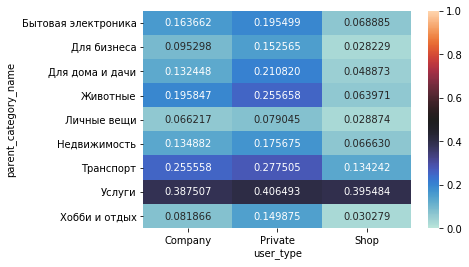

In [7]:
mean_probability = train.groupby(['parent_category_name','user_type'])['deal_probability'].mean().unstack()
sns.heatmap(mean_probability, vmin=0, vmax=1, center=0.5, annot=True, fmt="f")

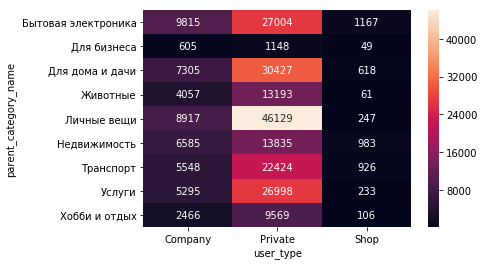

In [8]:
mean_probability2 = train[train['deal_probability'] > 0.3].groupby(['parent_category_name','user_type'])['deal_probability'].count().unstack()
sns.heatmap(mean_probability2, annot=True, fmt="d")

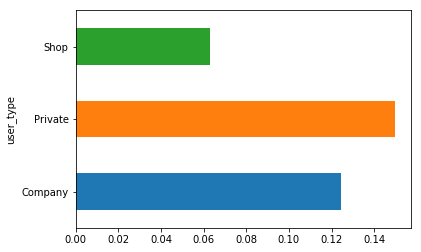

In [9]:
train.groupby('user_type')['deal_probability'].mean().plot(kind='barh')

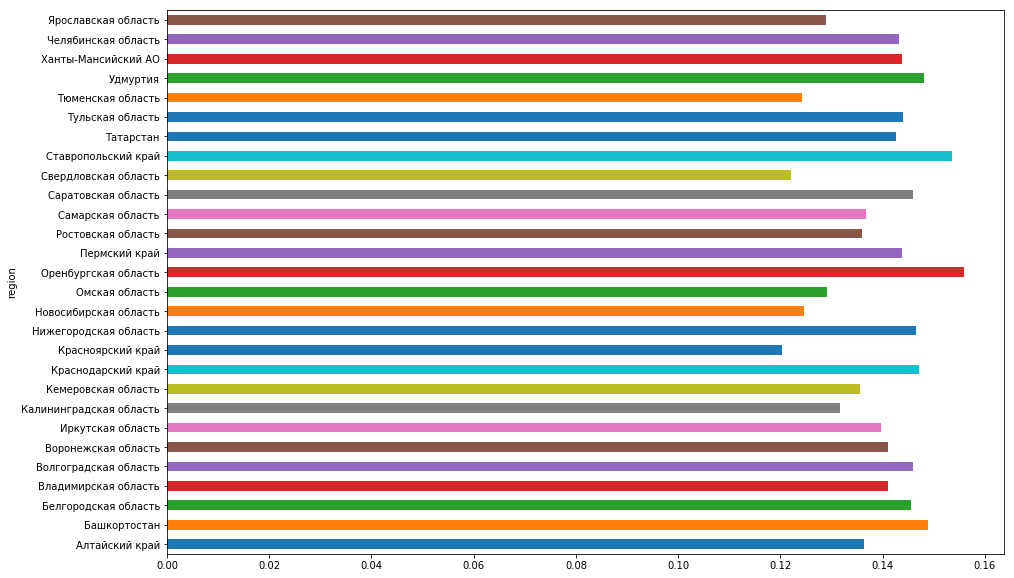

In [10]:
train.groupby('region')['deal_probability'].mean().plot(kind='barh', figsize=(15,10))

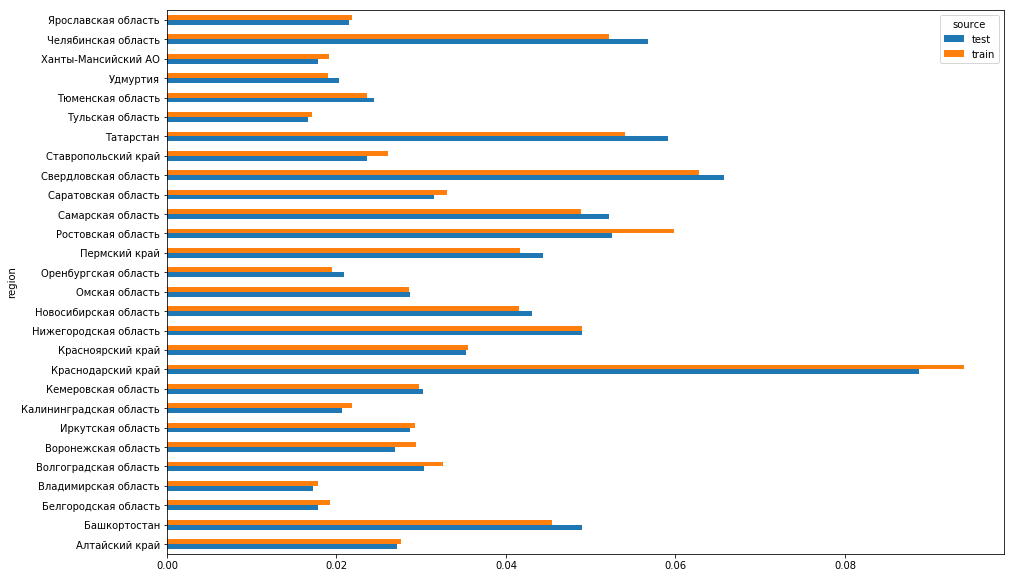

In [11]:
reg = df.groupby(['region','source'])['item_id'].count().unstack()
reg['test'] = reg['test'] / test.shape[0]
reg['train'] = reg['train'] / train.shape[0]
reg.plot(kind='barh',  figsize=(15,10))

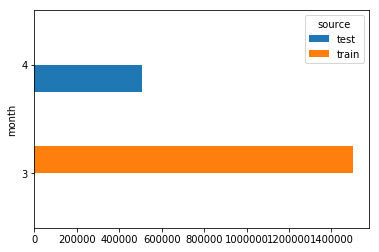

In [12]:
mon = df.groupby(['month','source'])['item_id'].count().unstack().fillna(0)
mon.plot(kind='barh')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002090E47ED30>,
      dtype=object)

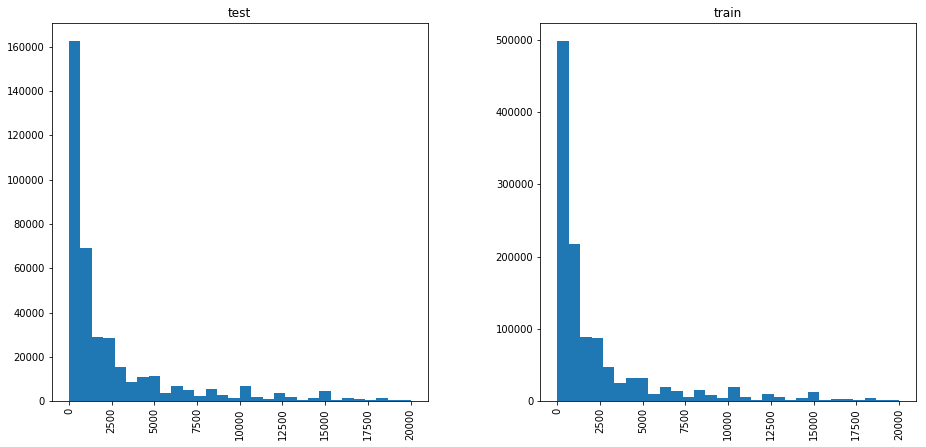

In [13]:
df.price[df.price<20000].hist(by=(df.source), bins=30, figsize=(15,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002090E363DD8>,
      dtype=object)

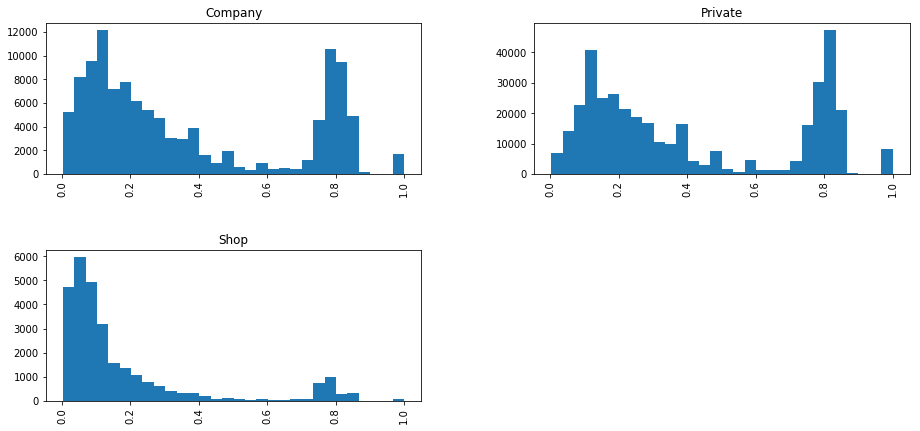

In [14]:
train[train.deal_probability>0].deal_probability.hist(by=(train.user_type),bins=30, figsize=(15,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209145A85C0>,
      dtype=object)

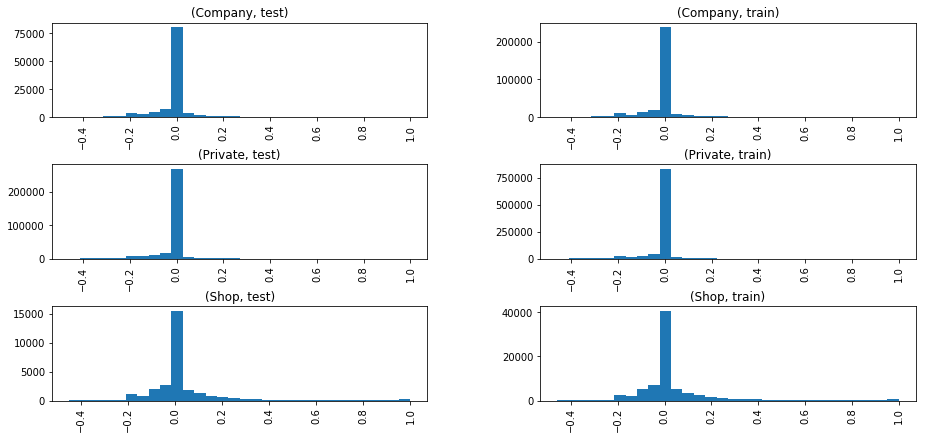

In [15]:
df2.price_normal.hist(by=([df2.user_type, df2.source]),bins=30, figsize=(15,7))

In [16]:
periods_train = pd.read_csv(dir + 'periods_train.csv', encoding='utf-8', low_memory=False, 
                            parse_dates=['activation_date','date_from','date_to'])
periods_test = pd.read_csv(dir + 'periods_test.csv', encoding='utf-8', low_memory=False, 
                           parse_dates=['activation_date','date_from','date_to'])
df_period = periods_train.append(periods_test, ignore_index=True)
display(df_period.shape)
df_period.head()

(30412334, 4)

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28


In [17]:
df_period['time_diff'] = ((df_period.date_to - df_period.date_from) / np.timedelta64(1, 'D')).astype(int)
df_period.head()

,item_id,activation_date,date_from,date_to,time_diff
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16,1
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18,3
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28,13
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28,9
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28,13


In [18]:
p_g = df_period.groupby('item_id')['time_diff'].sum()
p_min = df_period.groupby('item_id')['date_from'].min()
p_max = df_period.groupby('item_id')['date_to'].max()

In [19]:
p_c = df_period.groupby('item_id')['item_id'].count()
p_c.head()

item_id
00000077ff21    1
000002c54018    1
000005570503    1
0000060018e6    1
000006497719    2
Name: item_id, dtype: int64

In [20]:
p_max.head()

item_id
00000077ff21   2017-03-28
000002c54018   2017-04-18
000005570503   2017-04-13
0000060018e6   2017-04-18
000006497719   2017-04-18
Name: date_to, dtype: datetime64[ns]

In [21]:
per = pd.concat([p_g,p_c,p_min,p_max], axis=1)
per.head()

,time_diff,item_id,date_from,date_to
item_id,,,,
00000077ff21,13,1,2017-03-15,2017-03-28
000002c54018,6,1,2017-04-12,2017-04-18
000005570503,1,1,2017-04-12,2017-04-13
0000060018e6,6,1,2017-04-12,2017-04-18
000006497719,19,2,2017-03-15,2017-04-18


In [22]:
per['time_diff2'] = ((per.date_to - per.date_from) / np.timedelta64(1, 'D')).astype(int)

In [23]:
per = per.rename({'item_id': 'per_count'}, axis='columns')
per.reset_index(inplace=True)
per.head(20)

,item_id,time_diff,per_count,date_from,date_to,time_diff2
0,00000077ff21,13,1,2017-03-15,2017-03-28,13
1,000002c54018,6,1,2017-04-12,2017-04-18,6
2,000005570503,1,1,2017-04-12,2017-04-13,1
3,0000060018e6,6,1,2017-04-12,2017-04-18,6
4,000006497719,19,2,2017-03-15,2017-04-18,34
5,000006f5c0fd,11,3,2017-03-15,2017-04-18,34
6,0000079b5cc9,14,2,2017-03-20,2017-04-18,29
7,000009bdb078,13,1,2017-03-15,2017-03-28,13
8,00000ae3f45d,16,3,2017-03-15,2017-04-18,34
9,00000b33142e,19,2,2017-03-15,2017-04-18,34


In [24]:
df3 = pd.merge(df2, per, on='item_id', how='left')
df3.head()

,activation_date,category_name,city,deal_probability,description,item_id,month,param_1,param_2,param_3,...,user_id,user_type,mean,std,price_normal,time_diff,per_count,date_from,date_to,time_diff2
0,2017-03-28,Товары для детей и игрушки,Екатеринбург,0.12789,"Кокон для сна малыша,пользовались меньше месяц...",b912c3c6a6ad,3,Постельные принадлежности,NaN,NaN,...,e00f8ff2eaf9,Private,4129.398175,1.353662e+05,-0.013774,NaN,NaN,NaT,NaT,NaN
1,2017-03-26,Мебель и интерьер,Самара,0.00000,"Стойка для одежды, под вешалки. С бутика.",2dac0150717d,3,Другое,NaN,NaN,...,39aeb48f0017,Private,32201.494859,3.555820e+06,-0.004106,NaN,NaN,NaT,NaT,NaN
2,2017-03-20,Аудио и видео,Ростов-на-Дону,0.43177,"В хорошем состоянии, домашний кинотеатр с blu ...",ba83aefab5dc,3,"Видео, DVD и Blu-ray плееры",NaN,NaN,...,91e2f88dd6e3,Private,7518.729245,1.979137e+05,-0.008889,NaN,NaN,NaT,NaT,NaN
3,2017-03-25,Товары для детей и игрушки,Набережные Челны,0.80323,Продам кресло от0-25кг,02996f1dd2ea,3,Автомобильные кресла,NaN,NaN,...,bf5cccea572d,Company,4129.398175,1.353662e+05,-0.007126,NaN,NaN,NaT,NaT,NaN
4,2017-03-16,Автомобили,Волгоград,0.20797,Все вопросы по телефону.,7c90be56d2ab,3,С пробегом,ВАЗ (LADA),2110,...,ef50846afc0b,Private,377983.566760,5.233088e+05,-0.312153,NaN,NaN,NaT,NaT,NaN


In [25]:
#df3.to_pickle(dir + 'df2.pickle')